In [19]:
# Pandas
import pandas as pd
import matplotlib.pyplot as plt

# SQL Alchemy
from sqlalchemy import create_engine

In [3]:
# Create Engine for census data, path to the database
engine = create_engine('postgresql+psycopg2://alicesartori@localhost/EmployeDB')
conn = engine.connect()

In [4]:
# Query All Records in the the Salaries Table
salaries_df = pd.read_sql("SELECT * FROM salaries", conn)
salaries_df.sample(20).reset_index(drop=True)

,emp_no,salary
0,216217,46190
1,234375,48847
2,460046,54229
3,445985,45689
4,297943,44721
5,202599,50947
6,495796,64948
7,217388,50668
8,251161,97143
9,453269,40000


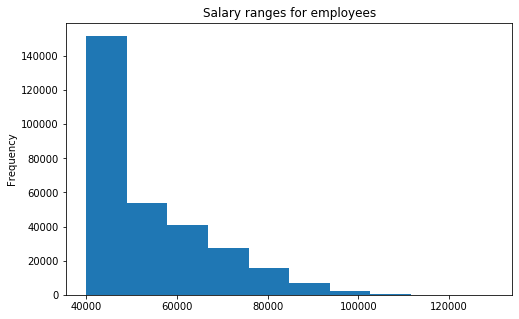

In [22]:
#Create a histogram to visualize the most common salary ranges for employees
salaries_df.salary.plot(kind='hist', title = "Salary ranges for employees", figsize=(8,5))
plt.savefig("Salary ranges for employees.png")

In [6]:
# Query All Records in the Zip Table
titles_data = pd.read_sql("SELECT * FROM titles", conn)
titles_data

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [7]:
employees_data = pd.read_sql("SELECT * FROM employees", conn)
employees_data

,emp_no,emp_title_id,first_name,last_name,sex,hire_date,birth_date
0,473302,s0001,Hideyuki,Zallocco,M,1990-04-28,1953-07-25
1,475053,e0002,Byong,Delgrande,F,1991-09-07,1954-11-18
2,57444,e0002,Berry,Babb,F,1992-03-21,1958-01-30
3,421786,s0001,Xiong,Verhoeff,M,1987-11-26,1957-09-28
4,282238,e0003,Abdelkader,Baumann,F,1991-01-18,1952-10-28
...,...,...,...,...,...,...,...
300019,464231,s0001,Constantino,Eastman,M,1988-10-28,1958-08-14
300020,255832,e0002,Yuping,Dayang,F,1995-02-26,1955-05-08
300021,76671,s0001,Ortrud,Plessier,M,1988-02-24,1959-06-09
300022,264920,s0001,Percy,Samarati,F,1994-09-08,1959-09-22


In [8]:
new_employees_df=employees_data.rename(columns={'emp_title_id':'title_id'})
new_employees_df

,emp_no,title_id,first_name,last_name,sex,hire_date,birth_date
0,473302,s0001,Hideyuki,Zallocco,M,1990-04-28,1953-07-25
1,475053,e0002,Byong,Delgrande,F,1991-09-07,1954-11-18
2,57444,e0002,Berry,Babb,F,1992-03-21,1958-01-30
3,421786,s0001,Xiong,Verhoeff,M,1987-11-26,1957-09-28
4,282238,e0003,Abdelkader,Baumann,F,1991-01-18,1952-10-28
...,...,...,...,...,...,...,...
300019,464231,s0001,Constantino,Eastman,M,1988-10-28,1958-08-14
300020,255832,e0002,Yuping,Dayang,F,1995-02-26,1955-05-08
300021,76671,s0001,Ortrud,Plessier,M,1988-02-24,1959-06-09
300022,264920,s0001,Percy,Samarati,F,1994-09-08,1959-09-22


In [9]:
# Merge the columns
combined_data = pd.merge(titles_data,new_employees_df, on="title_id")
combined_data2=pd.merge(combined_data,salaries_df, on="emp_no")
combined_data2

,title_id,title,emp_no,first_name,last_name,sex,hire_date,birth_date,salary
0,s0001,Staff,473302,Hideyuki,Zallocco,M,1990-04-28,1953-07-25,40000
1,s0001,Staff,421786,Xiong,Verhoeff,M,1987-11-26,1957-09-28,40000
2,s0001,Staff,273487,Christoph,Parfitt,M,1991-06-28,1957-04-14,56087
3,s0001,Staff,246449,Subbu,Bultermann,F,1988-03-25,1958-03-23,87084
4,s0001,Staff,48085,Venkatesan,Gilg,M,1993-06-28,1964-01-19,63016
...,...,...,...,...,...,...,...,...,...
300019,m0001,Manager,111400,Arie,Staelin,M,1985-01-01,1959-11-09,72446
300020,m0001,Manager,111133,Hauke,Zhang,M,1986-12-30,1955-03-16,71148
300021,m0001,Manager,110085,Ebru,Alpin,M,1985-01-01,1959-10-28,60026
300022,m0001,Manager,110386,Shem,Kieras,M,1988-10-14,1953-10-04,40000


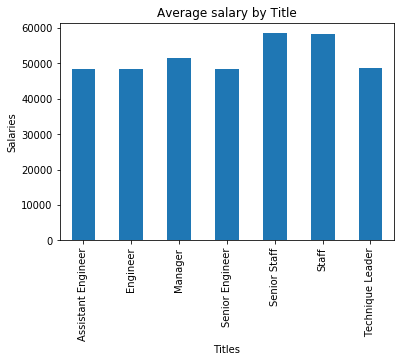

In [21]:
#Create a bar chart of average salary by title

ax=combined_data2.groupby('title')['salary'].mean().plot(kind='bar',title='Average salary by Title')
ax.set(xlabel="Titles", ylabel="Salaries")
plt.savefig("Average salary by Title.png")

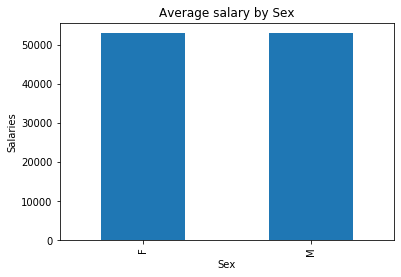

In [20]:
#Added another plot to see if the distribution of salaries changes by sex
ax=combined_data2.groupby('sex')['salary'].mean().plot(kind='bar',title='Average salary by Sex')
ax.set(xlabel="Sex", ylabel="Salaries")
plt.savefig("Average salary by Sex.png")